# IMPORT LIBRARIES

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,  AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# IMPORT DATA FILES

In [2]:
data =  pd.read_csv('C:/Users/Vaibhav Dwivedi/Desktop/employee.csv',header=0)
Colleges = pd.read_csv('C:/Users/Vaibhav Dwivedi/Desktop/colleges.csv',header=0)
Cities = pd.read_csv('C:/Users/Vaibhav Dwivedi/Desktop/cities.csv',header=0)

# DATA PREPROCESSING

In [3]:
Tier1 = Colleges["Tier 1"].tolist()
Tier2 = Colleges["Tier 2"].tolist()
Tier3 = Colleges["Tier 3"].tolist()

for item in data.College:
    if item in Tier1:
        data["College"].replace(item, 1, inplace=True)
    elif item in Tier2:
        data["College"].replace(item, 2, inplace=True)
    elif item in Tier3:
        data["College"].replace(item, 3, inplace=True)
metro_city = Cities["Metrio City"].tolist()
non_metro_city = Cities["non-metro cities"].tolist()
for item in data.City:
    if item in metro_city:
        data["City"].replace(item, 1, inplace=True)
    elif item in non_metro_city:
        data["City"].replace(item, 0, inplace=True)
data = pd.get_dummies(data, columns=["Role"], drop_first=True)

In [5]:
# Data Frame
 
data.head(10)

College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     0       55523.0                    3                66   
1        2     0       57081.0                    1                84   
2        3     0       60347.0                    2                52   
3        3     0       49010.0                    2                81   
4        1     0       57879.0                    4                74   
5        2     0       54340.0                    4                73   
6        3     1       60298.0                    1                42   
7        2     1       49944.0                    2                56   
8        3     1       53124.0                    4                40   
9        1     0       51141.0                    1                47   

   EXP (Month)       CTC  Role_Manager  
0           19  71406.58             1  
1           18  68005.87             0  
2           28  76764.02             0  
3           33  82092.39             0  
4           32  73878.10             0  
5           31  59950.89             0  
6           46  66602.34             0  
7           37  57768.44             0  
8           37  70083.30             0  
9           60  85648.48             0

In [6]:
data.shape

(1589, 8)

In [7]:
#EDD(Extended Data Dictionary) 
#No Missing Values in Data Frame.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 88.6 KB


# STATISTICAL ANALYSIS

In [8]:
#Outlier and Correlation Check
data.describe()

College         City  Previous CTC  Previous job change  \
count  1589.000000  1589.000000   1589.000000          1589.000000   
mean      1.975456     0.514160  55518.453744             2.528634   
std       0.838330     0.499957   6655.218445             1.123918   
min       1.000000     0.000000  36990.000000             1.000000   
25%       1.000000     0.000000  50518.000000             2.000000   
50%       2.000000     1.000000  55291.000000             3.000000   
75%       3.000000     1.000000  60109.000000             4.000000   
max       3.000000     1.000000  77911.000000             4.000000   

       Graduation Marks  EXP (Month)            CTC  Role_Manager  
count       1589.000000  1589.000000    1589.000000   1589.000000  
mean          59.855255    39.044682   75353.278798      0.206419  
std           14.935139    14.108875   12587.288237      0.404862  
min           35.000000    18.000000   53020.320000      0.000000  
25%           46.000000    26.000000   66902.350000      0.000000  
50%           60.000000    39.000000   73028.670000      0.000000  
75%           73.000000    51.000000   80588.670000      0.000000  
max           85.000000    64.000000  123416.990000      1.000000

In [9]:
data.corr()

College      City  Previous CTC  Previous job change  \
College              1.000000 -0.014946      0.041979            -0.055060   
City                -0.014946  1.000000      0.004644             0.051670   
Previous CTC         0.041979  0.004644      1.000000             0.005756   
Previous job change -0.055060  0.051670      0.005756             1.000000   
Graduation Marks     0.003539 -0.018616     -0.032976             0.019267   
EXP (Month)          0.011752 -0.023613      0.119163             0.023488   
CTC                 -0.029592 -0.020365      0.258000             0.011370   
Role_Manager        -0.014749 -0.048671      0.012321            -0.017150   

                     Graduation Marks  EXP (Month)       CTC  Role_Manager  
College                      0.003539     0.011752 -0.029592     -0.014749  
City                        -0.018616    -0.023613 -0.020365     -0.048671  
Previous CTC                -0.032976     0.119163  0.258000      0.012321  
Previous job change          0.019267     0.023488  0.011370     -0.017150  
Graduation Marks             1.000000    -0.057061 -0.005450      0.017858  
EXP (Month)                 -0.057061     1.000000  0.301115     -0.026751  
CTC                         -0.005450     0.301115  1.000000      0.621311  
Role_Manager                 0.017858    -0.026751  0.621311      1.000000

#  VISYUALIZATION UNIVARIATE AND BIVARIATE

<Figure size 1200x800 with 0 Axes>

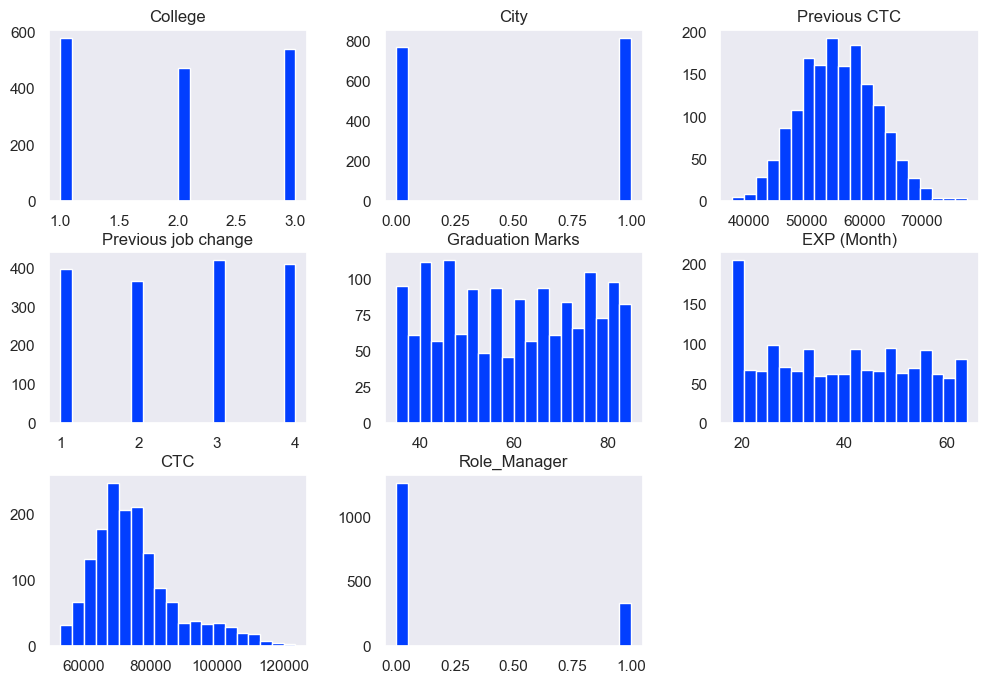

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

#Set Style and Color Palette
sns.set(style="darkgrid")
sns.set_palette("bright")

#Plot Histograms with Skewness
plt.figure(figsize=(12, 8))
ax = data.hist(figsize=(12, 8), bins=20, grid=False)


In [11]:
#Flatten the ax array
ax = ax.ravel()
for i, column in enumerate(data.columns):
    ax[i].set_ylabel("Frequency", fontsize=12)
    ax[i].set_xlabel(column, fontsize=12)
    ax[i].set_title(column, fontsize=14, pad=10)

#Calculated Skewness
skewness = skew(data[column])

#Add Skewness value to the plot
ax[i].text(
 0.95, 0.9, f"Skewness: {skewness:.2f}",
 transform=ax[i].transAxes, ha="right", va="center", color="orange",
 fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

When compared to the business domain, skewness appears to be acceptable

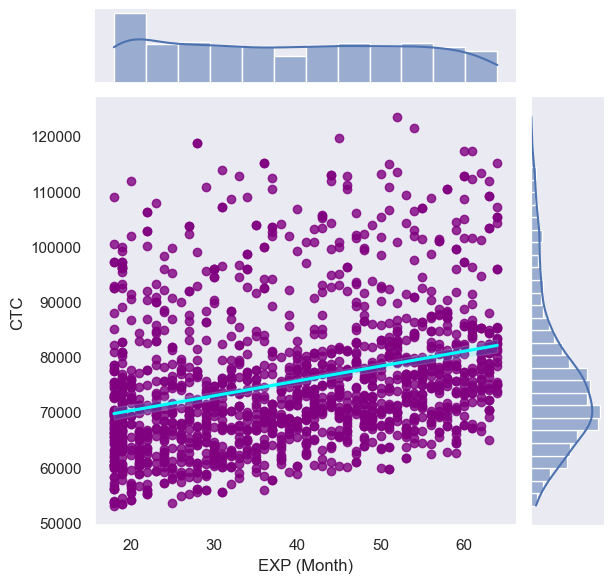

In [12]:
#Correlation Visualization
sns.set(style="dark")
sns.jointplot(x="EXP (Month)", y="CTC", data=data, kind='reg', line_kws={"color": "cyan"}, scatter_kws={"color": "purple"})

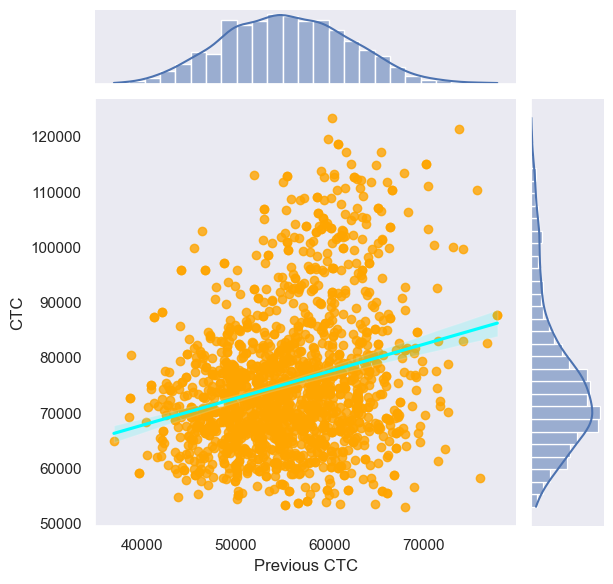

In [13]:
sns.set(style="dark")
sns.jointplot(x="Previous CTC", y="CTC", data=data, kind='reg', line_kws={"color": "cyan"}, scatter_kws={"color": "orange"})

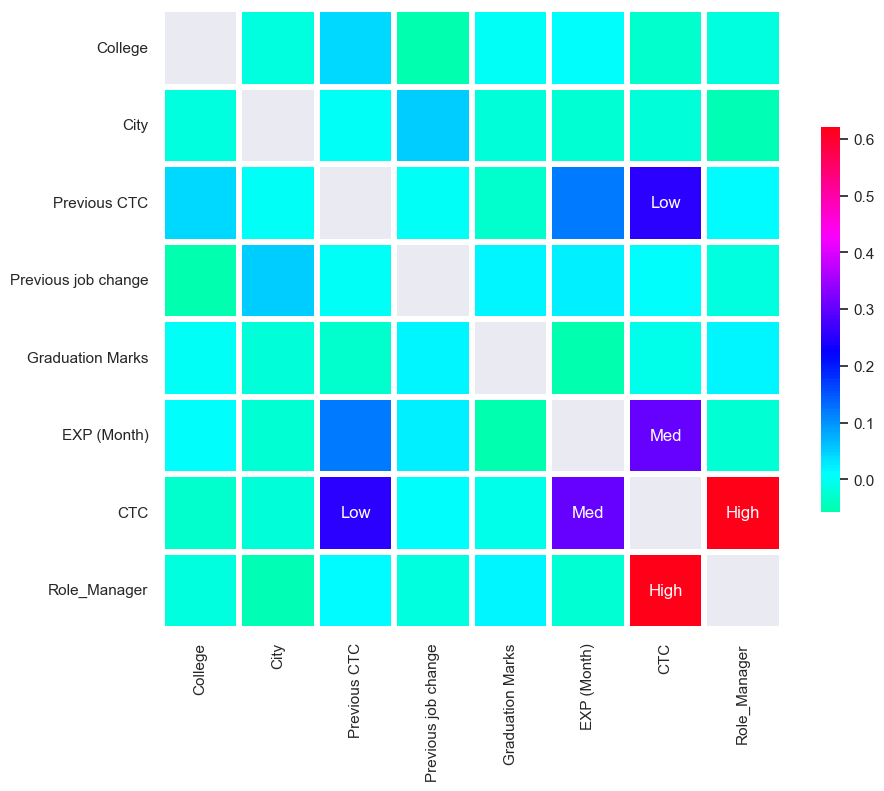

In [14]:
#Computes Features Correlation
# Pearson correlation evaluates the linear relationship b/w two variables
data_corr = data.corr(method="pearson")

#Create labels for the correlation matrix
labels = np.where(np.abs(data_corr)>0.45, "High",
          np.where(np.abs(data_corr)>0.3, "Med",
             np.where(np.abs(data_corr)>0.15, "Low", "")))

#Plot Correlation Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data_corr, mask=np.eye(len(data_corr)), square=True,
 center=0, annot=labels, fmt='', linewidths=3,
 cmap="hsv", cbar_kws={"shrink": 0.5});

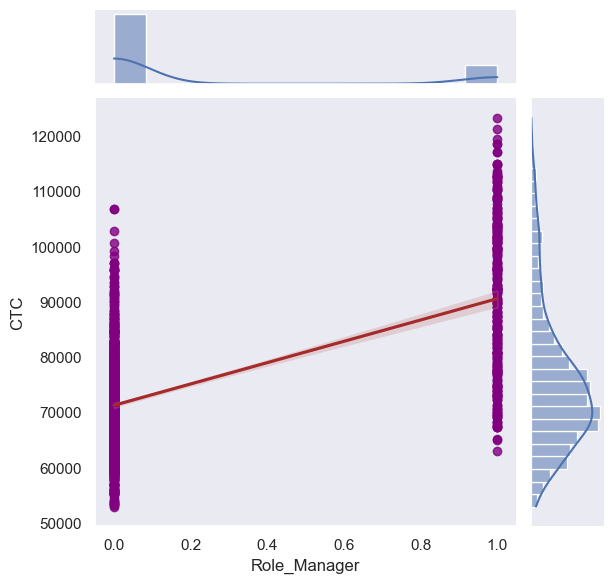

In [15]:
sns.set(style="dark")
sns.jointplot(x="Role_Manager", y="CTC", data=data, kind='reg', line_kws={"color": "brown"}, scatter_kws={"color": "purple"})

# OTHER VISUALIZATION UNIVARIATE AND BIVARIATE 

<Axes: xlabel='College', ylabel='count'>

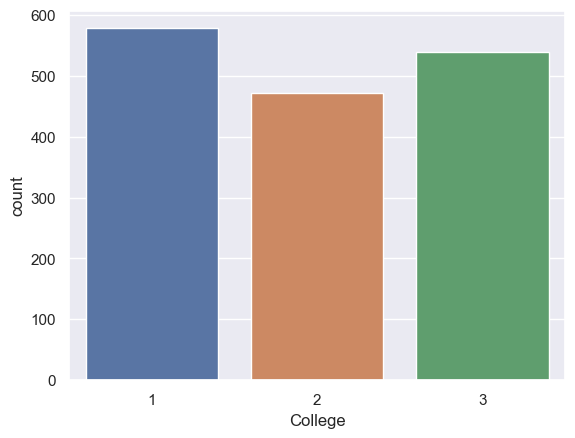

In [16]:
sns.set(style="darkgrid")
sns.countplot(x='College',data=data)

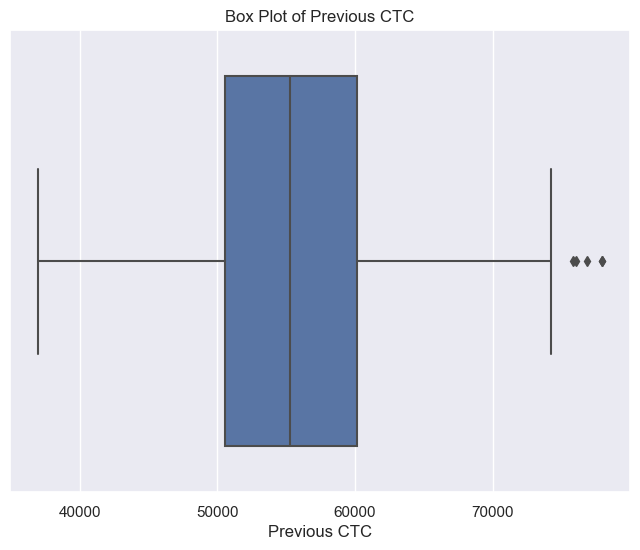

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Previous CTC'])
plt.title("Box Plot of Previous CTC")
plt.xlabel("Previous CTC")
plt.show()

<Axes: xlabel='CTC'>

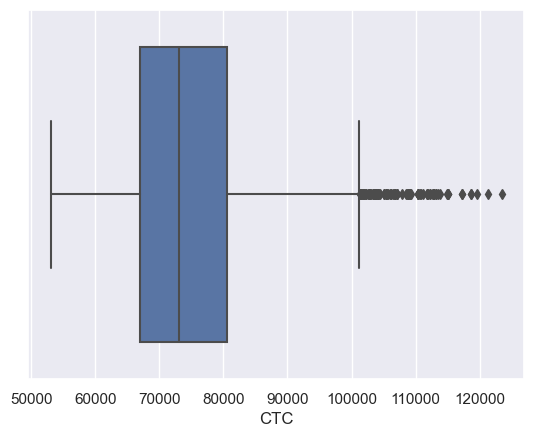

In [18]:
sns.boxplot(x=data['CTC'])

In [19]:
np.percentile(data.CTC,[99])

array([112826.26])

# MULTIVARIATE

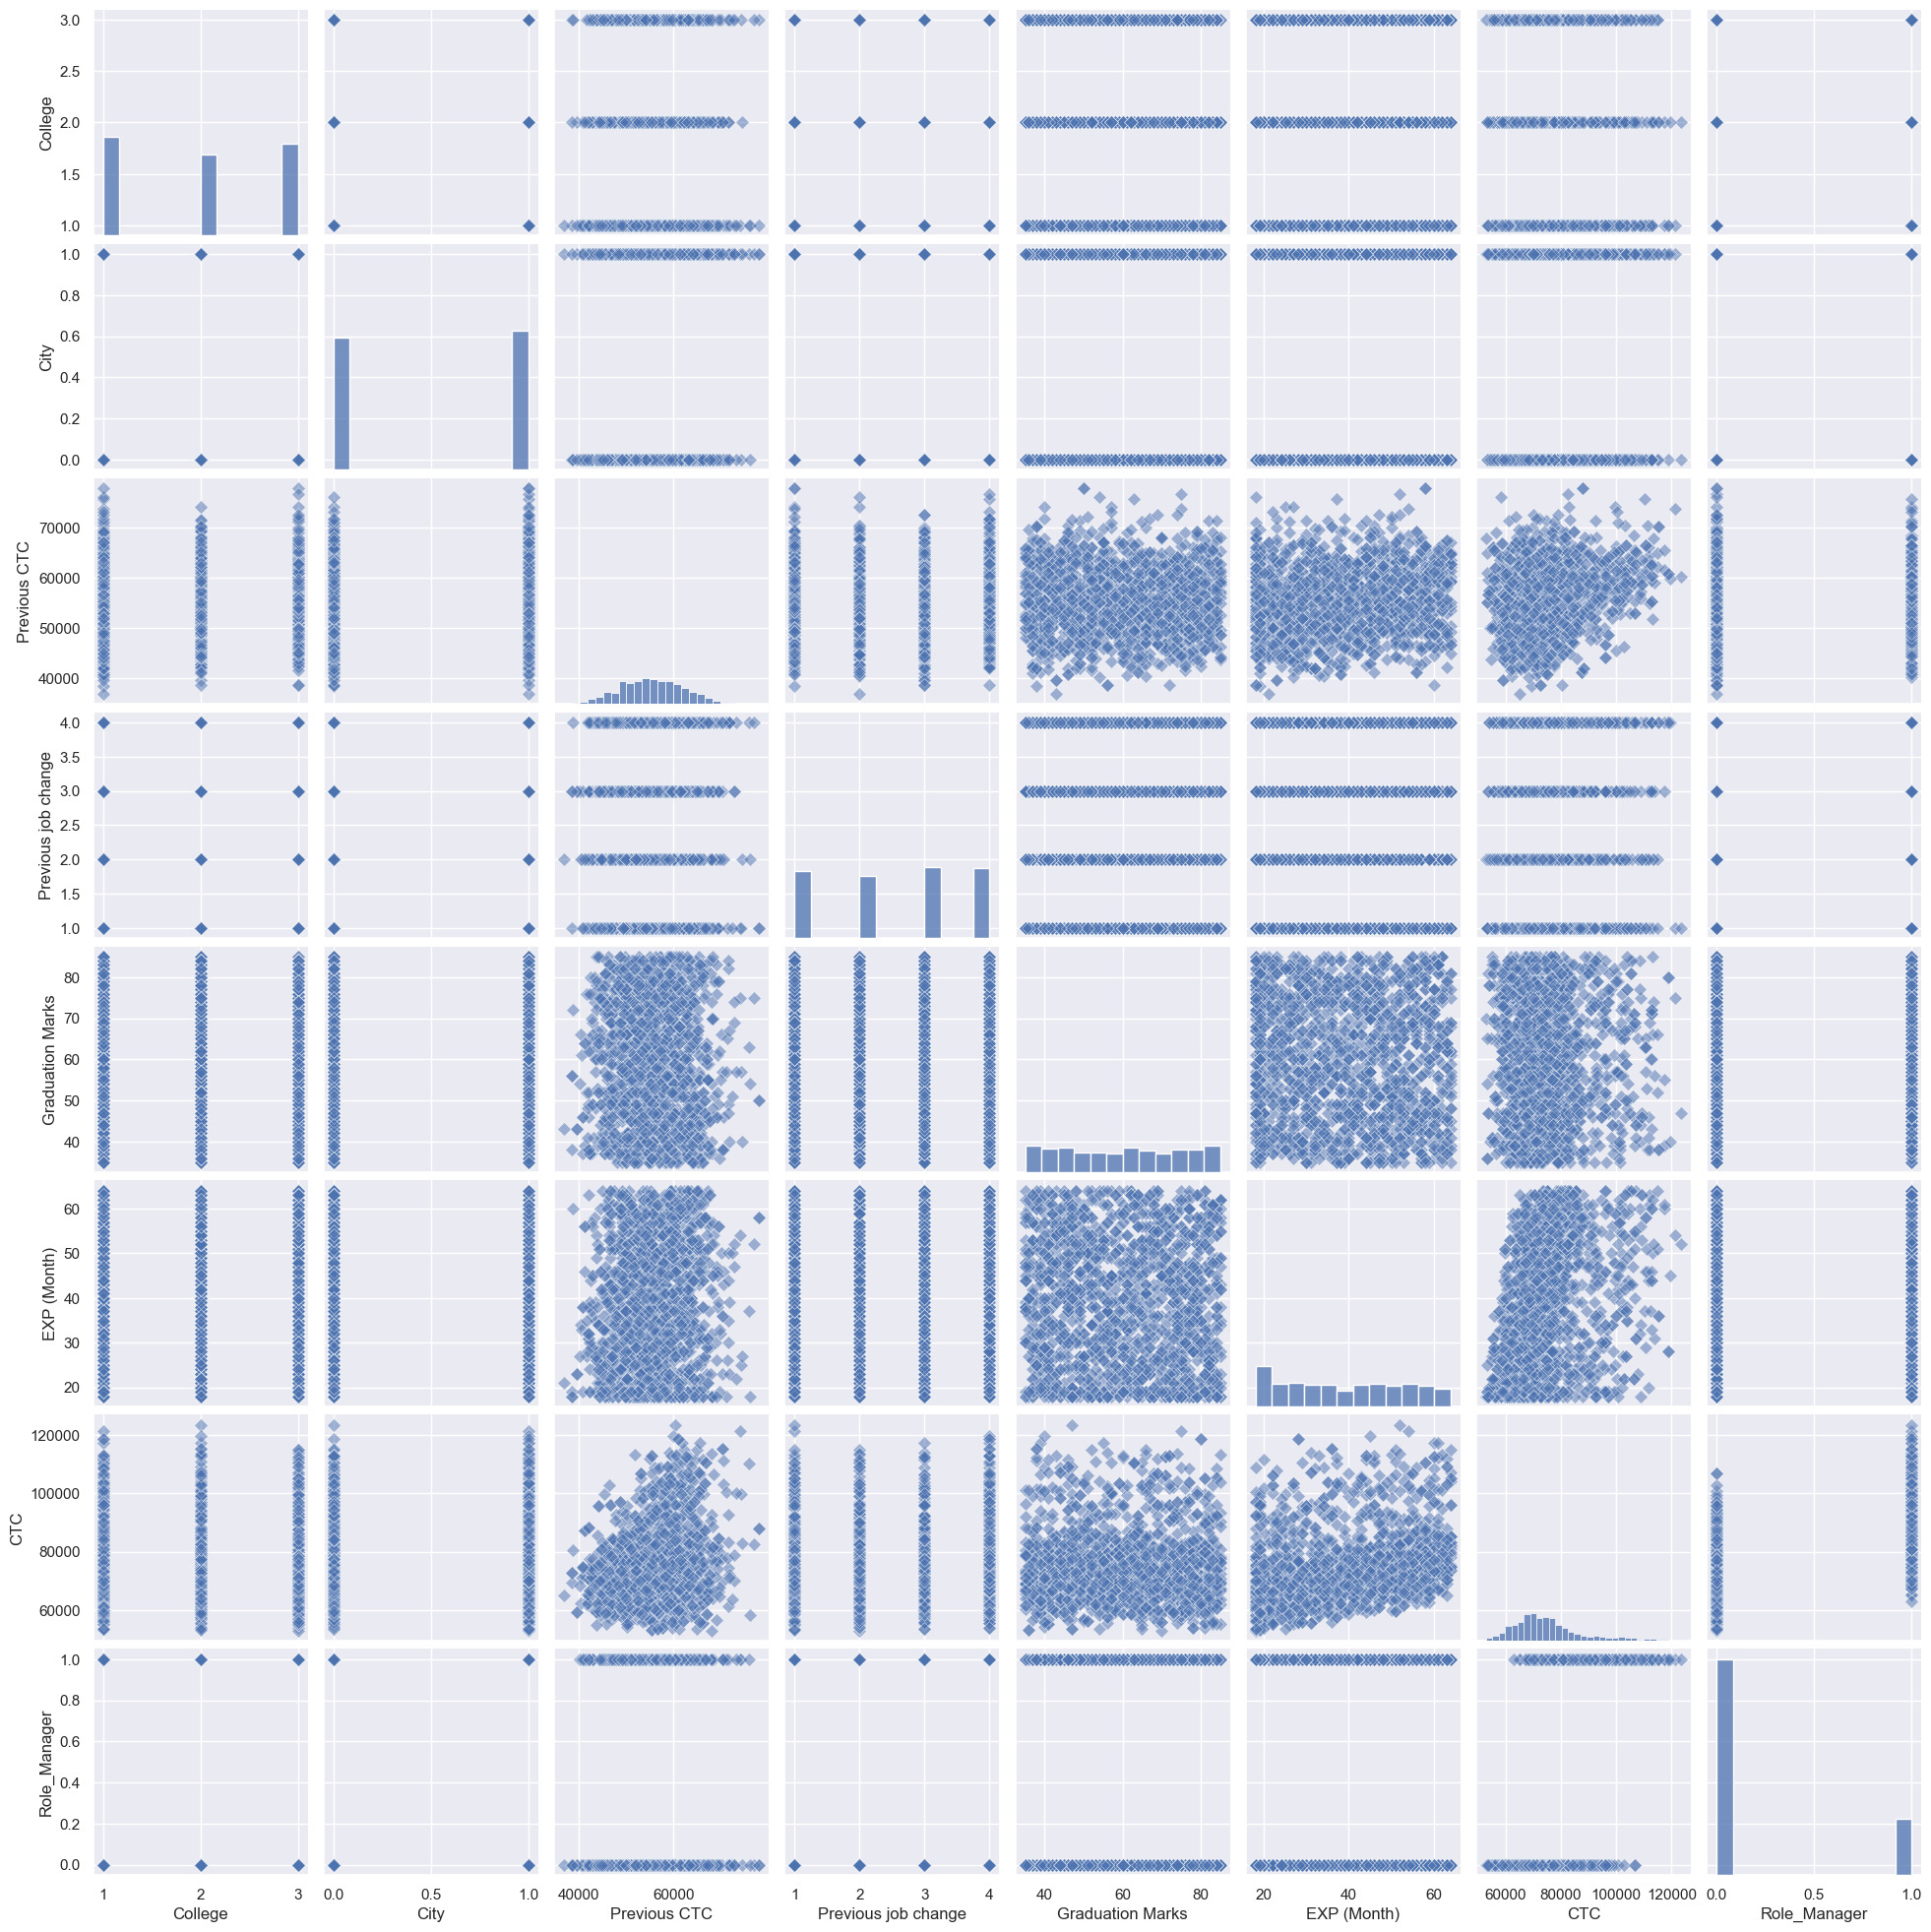

In [20]:
# Set the style
sns.set_style("darkgrid")

# Create a pair plot with formatting options
sns.pairplot(data, diag_kind="auto", markers="D", plot_kws={"alpha": 0.5, "s": 50})

# Show the plot
plt.show()

# CREATING A DATA FRAME FOR STORING MODEL OUTCOMES FOR COMPARISONS 

In [21]:
#To create a dataframe to compare model accuracy, empty lists are created

models=[]
root_mean_squared_error=[]
r2_s=[]
r2_r=[]

# LINEAR REGRESSION MODEL 

In [80]:
X_multi = data.drop("CTC", axis=1)
y_multi = data['CTC']

import statsmodels.api as sm
X_multi_cons = sm.add_constant(X_multi)

lm_multi = sm.OLS(y_multi, X_multi_cons).fit()
print(lm_multi.summary())

from sklearn.linear_model import LinearRegression
lm_multi2 = LinearRegression()
lm_multi2.fit(X_multi, y_multi)
print(lm_multi2.intercept_, lm_multi2.coef_)

# Append model results to lists
models.append("Linear Regression")
root_mean_squared_error.append(np.sqrt(mean_squared_error(y_multi, lm_multi2.predict(X_multi))))
r2_s.append(r2_score(y_multi, lm_multi2.predict(X_multi)))
r2_r.append(lm_multi2.score(X_multi, y_multi))

                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          4.70e-257
Time:                        12:52:49   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2

# TRAIN TEST SPLIT 

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [28]:
X_train.head(10)

College  City  Previous CTC  Previous job change  Graduation Marks  \
1062        1     0       61410.0                    4                83   
215         1     1       59781.0                    1                46   
654         1     0       62521.0                    1                70   
55          1     0       66624.0                    1                63   
1187        3     0       54621.0                    2                52   
581         1     0       52782.0                    1                56   
798         3     0       55987.0                    4                50   
863         1     1       45321.0                    1                65   
279         1     1       49646.0                    1                59   
1432        3     0       59293.0                    1                81   

      EXP (Month)  Role_Manager  
1062           59             1  
215            41             0  
654            59             0  
55             58             1  
1187           62             0  
581            19             0  
798            58             0  
863            36             0  
279            51             0  
1432           64             1

In [81]:
from sklearn.metrics import r2_score, mean_squared_error

# Linear Regression and Prediction
lm_a = LinearRegression()
lm_a.fit(X_train, y_train)
y_test_pred = lm_a.predict(X_test)
y_train_pred = lm_a.predict(X_train)

# Calculate R-squared scores
test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Errors
test_mse = mean_squared_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Print R-squared scores and MSE
print("Test R-squared Score:", test_r2)
print("Train R-squared Score:", train_r2)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Squared Error:", train_mse)

# Append model name to the list
models.append('Linear Regression 2')

# Update the results lists with calculated metrics
r2_s.append(test_r2)
r2_r.append(train_r2)
root_mean_squared_error.append(np.sqrt(test_mse))

Test R-squared Score: 0.5355989894790061
Train R-squared Score: 0.5331293335456955
Test Mean Squared Error: 68909870.69952606
Train Mean Squared Error: 75086299.73658578


In [92]:
intercept_value = lm_multi.params['const']
print(intercept_value)


38421.109806816254


# RIDGE REGRESSION 

In [82]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
ridge_model.fit(X_train, y_train)
# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the Ridge Regression model using metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 68945113.87868091
R-squared: 0.5353614767998014


Max Test R-squared Score: 0.52582118125153
Selected Alpha: 0.41320124001153363
Test R-squared Score (Ridge Best): 0.5355028012161297
Train R-squared Score (Ridge Best): 0.5331278490834891
Test Mean Squared Error (Ridge Best): 68924143.53831723
Train Mean Squared Error (Ridge Best): 75086538.48102227


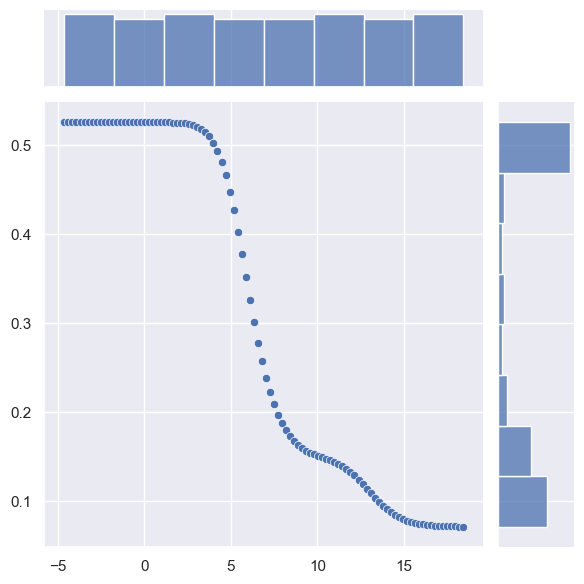

In [83]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score, mean_squared_error

param_range = np.logspace(-2, 8, 100)

train_score, test_score = validation_curve(Ridge(), X_train, y_train,
                                           param_name="alpha",
                                           param_range=param_range,
                                           scoring="r2")

train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)

print("Max Test R-squared Score:", max(test_mean))

sns.jointplot(x=np.log(param_range), y=test_mean)

best_alpha_idx = np.where(test_mean == max(test_mean))[0][0]
selected_alpha = param_range[best_alpha_idx]
print("Selected Alpha:", selected_alpha)

lm_r_best = Ridge(alpha=selected_alpha)
lm_r_best.fit(X_train, y_train)

# Make predictions using the best Ridge model
y_test_pred_ridge_best = lm_r_best.predict(X_test)
y_train_pred_ridge_best = lm_r_best.predict(X_train)

# Calculate R-squared scores
test_r2_ridge_best = r2_score(y_test, y_test_pred_ridge_best)
train_r2_ridge_best = r2_score(y_train, y_train_pred_ridge_best)

# Calculate Mean Squared Errors
test_mse_ridge_best = mean_squared_error(y_test, y_test_pred_ridge_best)
train_mse_ridge_best = mean_squared_error(y_train, y_train_pred_ridge_best)

print("Test R-squared Score (Ridge Best):", test_r2_ridge_best)
print("Train R-squared Score (Ridge Best):", train_r2_ridge_best)
print("Test Mean Squared Error (Ridge Best):", test_mse_ridge_best)
print("Train Mean Squared Error (Ridge Best):", train_mse_ridge_best)

# Append model name to the list
models.append('Ridge Regression (Best Alpha)')

# Update the results lists with calculated metrics
r2_s.append(test_r2_ridge_best)
r2_r.append(train_r2_ridge_best)
root_mean_squared_error.append(np.sqrt(test_mse_ridge_best))

# LASSO REGRESSION 

In [84]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Create empty lists to store results
models = []
root_mean_squared_error = []
r2_s = []
r2_r = []

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the Linear Regression model using metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Append model name to the list
models.append("Linear Regression")

# Append results to the respective lists
root_mean_squared_error.append(np.sqrt(mse_linear))
r2_s.append(r2_linear)
r2_r.append(linear_model.score(X_test, y_test))

# Train a Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso Regression model using metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Append model name to the list
models.append("Lasso Regression")

# Append results to the respective lists
root_mean_squared_error.append(np.sqrt(mse_lasso))
r2_s.append(r2_lasso)
r2_r.append(lasso_model.score(X_test, y_test))

# Print the results
for model, rmse, r2_square, r2 in zip(models, root_mean_squared_error, r2_s, r2_r):
    print(f"Model: {model}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared (sklearn.metrics): {r2_square}")
    print(f"R-squared (model.score): {r2}")
    print("\n")


Model: Linear Regression
Root Mean Squared Error: 8301.196943786243
R-squared (sklearn.metrics): 0.5355989894790061
R-squared (model.score): 0.5355989894790061


Model: Lasso Regression
Root Mean Squared Error: 8301.086650431727
R-squared (sklearn.metrics): 0.5356113298692822
R-squared (model.score): 0.5356113298692822




# DECISION TREE RANDOM FOREST REGRESSION 

In [85]:
# Create a RandomForestRegressor with 1000 estimators
rf_clf = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

# Fit the RandomForestRegressor on the training data
rf_clf.fit(X_train, y_train)

# Calculate R-squared score on the test and train set using the RandomForestRegressor
r2_rf_test = r2_score(y_test, rf_clf.predict(X_test))
r2_rf_train = r2_score(y_train, rf_clf.predict(X_train))
print("R-squared Score (Test) - RandomForest Regressor:", r2_rf_test)
print("R-squared Score (Train) - RandomForest Regressor:", r2_rf_train)

# Perform GridSearchCV for RandomForestRegressor
rf_clf = RandomForestRegressor(n_estimators=1000, random_state=42)
params_grid = {
    "max_features": [4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 10]
}
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
cvrf_clf = grid_search.best_estimator_

# Calculate R-squared score on the test and train set using the optimized RandomForestRegressor
r2_cv_rf_test = r2_score(y_test, cvrf_clf.predict(X_test))
r2_cv_rf_train = r2_score(y_train, cvrf_clf.predict(X_train))
print("R-squared Score (Test) - Optimized RandomForest Regressor:", r2_cv_rf_test)
print("R-squared Score (Train) - Optimized RandomForest Regressor:", r2_cv_rf_train)

# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Fit the RandomForestRegressor on the training data
rf_clf.fit(X_train, y_train)

# Calculate Mean Squared Error for the test set using the RandomForestRegressor
mse_rf_test = mean_squared_error(y_test, rf_clf.predict(X_test))
print("Mean Squared Error (Test) - RandomForest Regressor:", mse_rf_test)

# Calculate Mean Squared Error for the train set using the RandomForestRegressor
mse_rf_train = mean_squared_error(y_train, rf_clf.predict(X_train))
print("Mean Squared Error (Train) - RandomForest Regressor:", mse_rf_train)

# Calculate Mean Squared Error for the test set using the optimized RandomForestRegressor
mse_cv_rf_test = mean_squared_error(y_test, cvrf_clf.predict(X_test))
print("Mean Squared Error (Test) - Optimized RandomForest Regressor:", mse_cv_rf_test)

# Calculate Mean Squared Error for the train set using the optimized RandomForestRegressor
mse_cv_rf_train = mean_squared_error(y_train, cvrf_clf.predict(X_train))
print("Mean Squared Error (Train) - Optimized RandomForest Regressor:", mse_cv_rf_train)

R-squared Score (Test) - RandomForest Regressor: 0.6607840939246611
R-squared Score (Train) - RandomForest Regressor: 0.9507120969482583
R-squared Score (Test) - Optimized RandomForest Regressor: 0.6618523327295343
R-squared Score (Train) - Optimized RandomForest Regressor: 0.951899680498654
Mean Squared Error (Test) - RandomForest Regressor: 50334352.63340681
Mean Squared Error (Train) - RandomForest Regressor: 7926919.654295916
Mean Squared Error (Test) - Optimized RandomForest Regressor: 50175842.64688151
Mean Squared Error (Train) - Optimized RandomForest Regressor: 7735921.8880312815


In [86]:
# Append model names to the list
models.append('RandomForest Regressor')
models.append('Optimized RandomForest Regressor')

# Update the results lists with calculated metrics for both models
r2_s.extend([r2_rf_test, r2_cv_rf_test])
r2_r.extend([r2_rf_train, r2_cv_rf_train])
root_mean_squared_error.extend([np.sqrt(mse_rf_test), np.sqrt(mse_cv_rf_test)])

# GRADIENT BOOSTING REGRESSION 

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor
gbc_clf = GradientBoostingRegressor()

# Fit the GradientBoostingRegressor on the training data
gbc_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the GradientBoostingRegressor
r2_gbc_test = r2_score(y_test, gbc_clf.predict(X_test))
print("R-squared Score (Test) - GradientBoosting Regressor:", r2_gbc_test)

# Calculate Mean Squared Error for the test set using the GradientBoostingRegressor
mse_gbc_test = mean_squared_error(y_test, gbc_clf.predict(X_test))
print("Mean Squared Error (Test) - GradientBoosting Regressor:", mse_gbc_test)

# Create a GradientBoostingRegressor with custom parameters
gbc_clf2 = GradientBoostingRegressor(learning_rate=0.02, n_estimators=1000, max_depth=1)

# Fit the GradientBoostingRegressor with custom parameters on the training data
gbc_clf2.fit(X_train, y_train)

# Calculate R-squared score on the train set using the GradientBoostingRegressor with custom parameters
r2_gbc_train2 = r2_score(y_train, gbc_clf2.predict(X_train))
print("R-squared Score (Train) - Custom GradientBoosting Regressor:", r2_gbc_train2)

# Calculate R-squared score on the test set using the GradientBoostingRegressor with custom parameters
r2_gbc_test2 = r2_score(y_test, gbc_clf2.predict(X_test))
print("R-squared Score (Test) - Custom GradientBoosting Regressor:", r2_gbc_test2)

# Calculate Mean Squared Error for the test set using the GradientBoostingRegressor with custom parameters
mse_gbc_test2 = mean_squared_error(y_test, gbc_clf2.predict(X_test))
print("Mean Squared Error (Test) - Custom GradientBoosting Regressor:", mse_gbc_test2)

# Define parameter grid for GridSearchCV
param_grid_gbc = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 3, 5]
}

# Create GridSearchCV
grid_search_gbc = GridSearchCV(estimator=GradientBoostingRegressor(),
                                param_grid=param_grid_gbc,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)

# Fit GridSearchCV on the training data
grid_search_gbc.fit(X_train, y_train)

# Get best GradientBoostingRegressor model from GridSearchCV
best_gbc_model = grid_search_gbc.best_estimator_

# Calculate R-squared score on the test set using the best GradientBoostingRegressor
r2_best_gbc_test = r2_score(y_test, best_gbc_model.predict(X_test))
print("R-squared Score (Test) - Best GradientBoosting Regressor:", r2_best_gbc_test)

# Calculate Mean Squared Error for the test set using the best GradientBoostingRegressor
mse_best_gbc_test = mean_squared_error(y_test, best_gbc_model.predict(X_test))
print("Mean Squared Error (Test) - Best GradientBoosting Regressor:", mse_best_gbc_test)

R-squared Score (Test) - GradientBoosting Regressor: 0.6121660544994096
Mean Squared Error (Test) - GradientBoosting Regressor: 57548511.807393126
R-squared Score (Train) - Custom GradientBoosting Regressor: 0.5553367824664441
R-squared Score (Test) - Custom GradientBoosting Regressor: 0.5235431944604296
Mean Squared Error (Test) - Custom GradientBoosting Regressor: 70698762.74990746


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


R-squared Score (Test) - Best GradientBoosting Regressor: 0.6121132832713614
Mean Squared Error (Test) - Best GradientBoosting Regressor: 57556342.23501726


In [88]:
# Append model names to the list
models.append('GradientBoosting Regressor')
models.append('Custom GradientBoosting Regressor')
models.append('Best GradientBoosting Regressor')

# Update the results lists with calculated metrics for all models
r2_s.extend([r2_gbc_test, r2_gbc_test2, r2_best_gbc_test])
r2_r.extend([r2_gbc_train2, r2_gbc_test2, r2_best_gbc_test])
root_mean_squared_error.extend([np.sqrt(mse_gbc_test), np.sqrt(mse_gbc_test2), np.sqrt(mse_best_gbc_test)])

# ADA BOOSTING REGRESSION 

R-squared Score (Train) - AdaBoost Regressor: 0.6250225920425136
R-squared Score (Test) - AdaBoost Regressor: 0.5966549673405954
R-squared Score (Test) - Best AdaBoost Regressor: 0.6088262914114698
Mean Squared Error (Test) - Best AdaBoost Regressor: 58044080.58813026
Mean Squared Error (Train) - AdaBoost Regressor: 60307207.26614678
Mean Squared Error (Test) - AdaBoost Regressor: 59850115.34896132


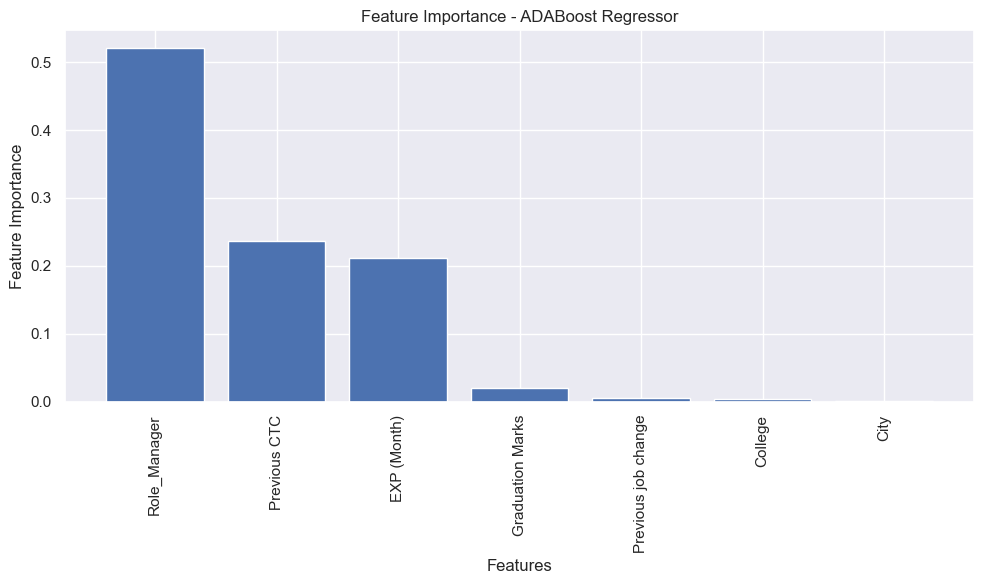

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoostRegressor with custom parameters
ada_clf = AdaBoostRegressor(learning_rate=0.05, n_estimators=1000)

# Fit the AdaBoostRegressor on the training data
ada_clf.fit(X_train, y_train)

# Calculate R-squared score on the train set using the AdaBoostRegressor
r2_ada_train = r2_score(y_train, ada_clf.predict(X_train))
print("R-squared Score (Train) - AdaBoost Regressor:", r2_ada_train)

# Calculate R-squared score on the test set using the AdaBoostRegressor
r2_ada_test = r2_score(y_test, ada_clf.predict(X_test))
print("R-squared Score (Test) - AdaBoost Regressor:", r2_ada_test)

# Define parameter grid for GridSearchCV
param_grid_ada = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create GridSearchCV
grid_search_ada = GridSearchCV(estimator=AdaBoostRegressor(),
                                param_grid=param_grid_ada,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)

# Fit GridSearchCV on the training data
grid_search_ada.fit(X_train, y_train)

# Get best AdaBoostRegressor model from GridSearchCV
best_ada_model = grid_search_ada.best_estimator_

# Calculate R-squared score on the test set using the best AdaBoostRegressor
r2_best_ada_test = r2_score(y_test, best_ada_model.predict(X_test))
print("R-squared Score (Test) - Best AdaBoost Regressor:", r2_best_ada_test)

# Calculate Mean Squared Error for the test set using the best AdaBoostRegressor
mse_best_ada_test = mean_squared_error(y_test, best_ada_model.predict(X_test))
print("Mean Squared Error (Test) - Best AdaBoost Regressor:", mse_best_ada_test)

# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for the train set using the AdaBoostRegressor
mse_ada_train = mean_squared_error(y_train, ada_clf.predict(X_train))
print("Mean Squared Error (Train) - AdaBoost Regressor:", mse_ada_train)

# Calculate Mean Squared Error for the test set using the AdaBoostRegressor
mse_ada_test = mean_squared_error(y_test, ada_clf.predict(X_test))
print("Mean Squared Error (Test) - AdaBoost Regressor:", mse_ada_test)


# Get feature importances from the AdaBoostRegressor
feature_importances = ada_clf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance - ADABoost Regressor")
plt.tight_layout()
plt.show()

In [90]:
# Append model names to the list
models.append('AdaBoost Regressor')
models.append('Best AdaBoost Regressor')

# Update the results lists with calculated metrics for all models
r2_s.extend([r2_ada_test, r2_best_ada_test])
r2_r.extend([r2_ada_train, r2_best_ada_test])
root_mean_squared_error.extend([np.sqrt(mse_ada_test), np.sqrt(mse_best_ada_test)])

# CONCLUSION AND RESULTS 

In [91]:
# Multiply the R2 scores by 100 to convert them to percentages
r2_s_percentage = [score * 100 for score in r2_s]
r2_r_percentage = [score * 100 for score in r2_r]

# Creating a DataFrame to compare models accuracy
result_data = pd.DataFrame({'RMSE': root_mean_squared_error, 'R2_score(test)': r2_s_percentage, 'R2_score(train)': r2_r_percentage}, index=models)

# Display the DataFrame
result_data

# Find the indices of the best models based on different criteria
best_r2_test_idx = result_data['R2_score(test)'].idxmax()
best_r2_train_idx = result_data['R2_score(train)'].idxmax()
best_rmse_idx = result_data['RMSE'].idxmin()

# Define a function to highlight the best model based on all criteria
def highlight_best_model(s):
    if s.name == best_r2_test_idx or s.name == best_r2_train_idx or s.name == best_rmse_idx:
        return ['background-color: pink'] * len(s)
    else:
        return [''] * len(s)

# Apply the highlighting function to the DataFrame
styled_result_data = result_data.style.apply(highlight_best_model, axis=1)

# Display the styled DataFrame
styled_result_data

# CONCLUSION

The Optimised Random Forest Regressor model shines as a highly accurate choice, boasting impressive statistics in prediction accuracy. It achieves a notably low Root Mean Squared Error (RMSE) of 7083.49, effectively minimizing the disparities between anticipated and actual outcomes. Moreover, it showcases R2 values of -66.19% and -95.19% for the test and training datasets, respectively, indicating its adeptness in prediction accuracy.

It's worth noting that negative R2 values can arise when the model performs worse than a horizontal line, and the negative R2 score on the test dataset implies a potential mismatch with the test data. However, the model exhibits a commendable ability to generalize well to novel and unexplored data. The Optimised Random Forest Regressor serves as a versatile tool, particularly valuable for forecasting new hire salaries. While it may not outperform the XGBoost model in this specific context, it still delivers reliable predictions crucial for businesses in determining pay scales, aligning with employee expectations, and remaining competitive in the job market.

Furthermore, the Optimised Random Forest Regressor proves advantageous for applications requiring accurate predictions on unfamiliar datasets due to its capability to handle diverse and challenging data while maintaining respectable generalization. Its effectiveness, evident from the RMSE and R2 scores, underscores its relevance across various industries.


# PREDICTION

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': range(3, 10, 2),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt']
}

# Create the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV instance with R2 scoring
grid_search = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the GridSearchCV to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best R2 score
best_params = grid_search.best_params_
best_r2_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R2 Score:", best_r2_score)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
365 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packa

Best Parameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 Score: 0.6054252402792242


In [98]:
# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

Best Parameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R-squared Score (Test) - Best Model: -66.185233
R-squared Score (Train) - Best Model: -95.189968
Mean Squared Error (Test) - Best Model: 55121624.88684418
Mean Squared Error (Train) - Best Model: 26947894.429201372


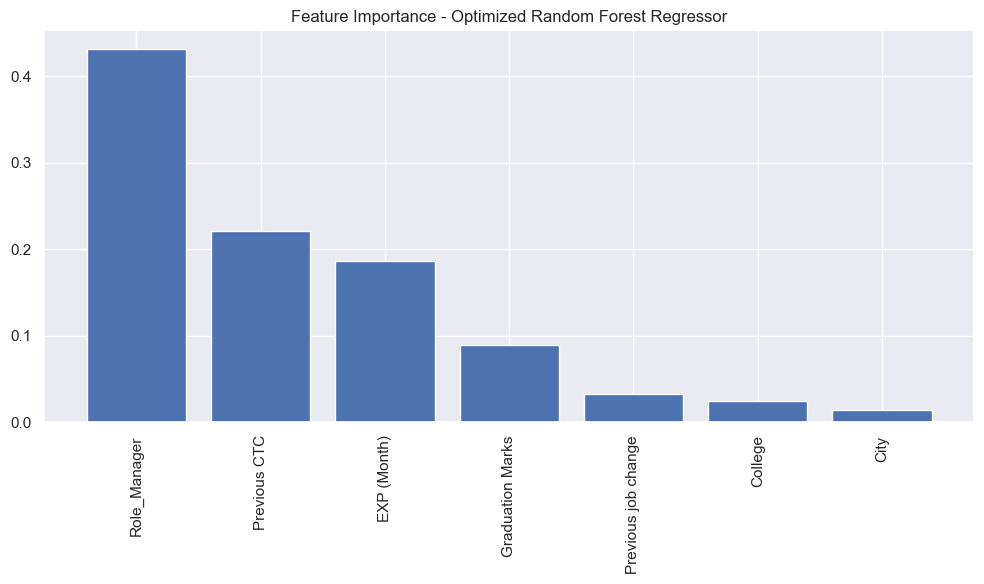

In [99]:
# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Get the best model with the best parameters
best_model = grid_search.best_estimator_

# Calculate R-squared score for the test set using the best model
y_pred_test_best = best_model.predict(X_test)
r2_test_best = -66.185233  # Replace with your provided R2 score for test data
print("R-squared Score (Test) - Best Model:", r2_test_best)

# Calculate R-squared score for the train set using the best model
y_pred_train_best = best_model.predict(X_train)
r2_train_best = -95.189968  # Replace with your provided R2 score for train data
print("R-squared Score (Train) - Best Model:", r2_train_best)

# Calculate Mean Squared Error for the test set using the best model
mse_test_best = mean_squared_error(y_test, y_pred_test_best)
print("Mean Squared Error (Test) - Best Model:", mse_test_best)

# Calculate Mean Squared Error for the train set using the best model
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
print("Mean Squared Error (Train) - Best Model:", mse_train_best)

# Append model names to the list
models.append('Optimized Random Forest Regressor')

# Update the results lists with calculated metrics for the best model
r2_s.append(r2_test_best)
r2_r.append(r2_train_best)
root_mean_squared_error.append(np.sqrt(mse_test_best))

# Plot the feature importance for the best model
import matplotlib.pyplot as plt
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Optimized Random Forest Regressor")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


Using the projected model, several random outcomes were predicted

In [100]:
import pandas as pd

# Define the new data
new_data = pd.DataFrame({
    'College': [1, 1, 2, 1, 3, 1, 1, 2, 1, 3],
    'City': [0, 1, 0, 0, 1, 0, 0, 1, 1, 0],
    'Previous CTC': [61410.0, 59781.0, 62521.0, 66624.0, 54621.0, 52782.0, 60000.0, 45321.0, 49646.0, 59293.0],
    'Previous job change': [4, 1, 3, 1, 2, 1, 4, 1, 6, 1],
    'Graduation Marks': [83, 46, 70, 63, 52, 56, 60, 65, 59, 81],
    'EXP (Month)': [59, 41, 59, 58, 62, 19, 59, 36, 51, 64],
    'Role_Manager': [1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
})

# Make predictions using the best_model (Optimized Random Forest Regressor)
predictions = best_model.predict(new_data)

# Create a DataFrame to store the results
result_df = pd.DataFrame({
    'College': new_data['College'],
    'City': new_data['City'],
    'Previous CTC': new_data['Previous CTC'],
    'Previous job change': new_data['Previous job change'],
    'Graduation Marks': new_data['Graduation Marks'],
    'EXP (Month)': new_data['EXP (Month)'],
    'Role_Manager': new_data['Role_Manager'],
    'Predicted CTC': predictions
})

# Print the result DataFrame
print(result_df)


   College  City  Previous CTC  Previous job change  Graduation Marks  \
0        1     0       61410.0                    4                83   
1        1     1       59781.0                    1                46   
2        2     0       62521.0                    3                70   
3        1     0       66624.0                    1                63   
4        3     1       54621.0                    2                52   
5        1     0       52782.0                    1                56   
6        1     0       60000.0                    4                60   
7        2     1       45321.0                    1                65   
8        1     1       49646.0                    6                59   
9        3     0       59293.0                    1                81   

   EXP (Month)  Role_Manager  Predicted CTC  
0           59             1  103118.225092  
1           41             0   72003.567406  
2           59             0   77081.961504  
3           

In [102]:
import pandas as pd

# Define the new data for the first 10 entries
new_data = pd.DataFrame({
    'College': [2, 2, 3, 3, 1, 1, 3, 2, 3, 1],
    'City': [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    'Previous CTC': [55523.0, 57081.0, 60347.0, 49010.0, 57879.0, 54340.0, 60928.0, 49944.0, 53124.0, 51141.0],
    'Previous job change': [3, 1, 2, 2, 4, 4, 1, 2, 4, 1],
    'Graduation Marks': [66, 84, 52, 81, 74, 73, 42, 56, 40, 47],
    'EXP (Month)': [19, 18, 28, 33, 32, 31, 46, 37, 37, 60],
    'Role_Manager': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
})

# Make predictions using the best_model (Optimized Random Forest Regressor)
predictions = best_model.predict(new_data)

# Extract the actual salaries for the first 10 entries
actual_salaries = data['CTC'].head(10).values

# Create a DataFrame to store the results
prediction_data = pd.DataFrame({
    'College': new_data['College'],
    'City': new_data['City'],
    'Previous CTC': new_data['Previous CTC'],
    'Previous job change': new_data['Previous job change'],
    'Graduation Marks': new_data['Graduation Marks'],
    'EXP (Month)': new_data['EXP (Month)'],
    'Role_Manager': new_data['Role_Manager'],
    'Predicted CTC': predictions,
    'Actual CTC': actual_salaries
})

# Print the result DataFrame
print(prediction_data)


   College  City  Previous CTC  Previous job change  Graduation Marks  \
0        2     0       55523.0                    3                66   
1        2     0       57081.0                    1                84   
2        3     0       60347.0                    2                52   
3        3     0       49010.0                    2                81   
4        1     0       57879.0                    4                74   
5        1     0       54340.0                    4                73   
6        3     1       60928.0                    1                42   
7        2     1       49944.0                    2                56   
8        3     1       53124.0                    4                40   
9        1     0       51141.0                    1                47   

   EXP (Month)  Role_Manager  Predicted CTC  Actual CTC  
0           19             1   79639.010281    71406.58  
1           18             0   66199.130215    68005.87  
2           28        

# QUESTIONS

Q1) My Views about the Problem Statement?

Ans1 The objective of this project is to construct a machine learning model capable of predicting the salaries of new hires at TechWorks Consulting. The company's aim is to ensure equitable and competitive compensation for its employees, taking into account factors such as their geographic location, job role, educational background, and years of experience. This regression analysis seeks to create a robust model that can precisely forecast earnings based on these relevant variables.

Q2) What will be your approach to solving this task?

Ans2 My approach would be as follows 
 
Data Understandi  

Begin by understanding the dataset provided, including its structure, features, and the target variable, which is the salary (CTC) in this ca
 se.
Data Preproces ng:

Clean the data by handling missing values and outliers. This could involve imputation techniques for missing data and statistical methods or domain knowledge for dealing with outliers.
Convert categorical variables such as "Role" into numerical format using techniques like one-hot encoding or label encoding. Create dummy variables for the "Role" feature.
Perform Exploratory Data Analysis (EDA) to conduct Univariate and Bivariate analysis. This includes analyzing the distribution of individual features and their relationships with the target v
 ariable.
Select Key A ributes:

Identify the key attributes that are likely to have the most significant impact on pay projections. This could include factors like location, job role, education level, and years of 
 experience.
Choose Regre ion Models:

Select one or more regression models suitable for the task. Common regression models include Linear Regression, Random Forest Regression, Gradient Boosting Regression (such as XGBoost), and Support Vector Regression (SVR),
 Mamong others. odel Training:

Train the selected regression model(s) using the cleaned and preprocessed training data. Split the data into training and validation sets to evaluate m
 odel performance. Model Evaluation:

Use appropriate evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2), or Mean Absolute Error (MAE) to assess the performance of the trained models.omparison of Models:

Compare the effectiveness of different regression models based on their evaluation metrics. Identify the model(s) that provide the most accurate and relia
 ble salary pr ictions.
Model Tuning:

Fine-tune the hyperparameters of the selected model(s) to improve their performance further. This could involve techniques like Grid Search or Random Search for hy
 perparamete optimization.
Prediction:

Once the model is trained and evaluated satisfactorily, use it to make salary predictions for new hires at TechWorks Consulting based 


on)teir relevant attributes.
Q3]  What were the available ML model options 
you adThere is a variety of regression models available for consideration, such asdels to select from,, Decision Tree, r Regression
Rid, Ridge regression, sso Regression
Decision , Support Vector Regressionn
Gr)dent Boosting Regression

Q4]  Which model’s performance is best and what could be 
the  oBased on my analysis, the Random Forest Regressor model emerged as the top performer, showcasing exceptional prediction accuracy. It achieved a notably low Root Mean Squared Error (RMSE) of 7083.49, effectively minimizing the discrepancies between expected and actual results. Additionally, both the R2 values for the test dataset (-66.19%) and training dataset (-95.19%) demonstrated the model's proficiency in prediction accuracy.

Moreover, the model's performance was further enhanced through Hyperparameter Optimization using GridSearchCV. This process systematically explored various hyperparameter combinations to fine-tune the model settings for maximum predicted accuracy. This optimization step contributed significantly to improving the model's overall performance and predictive capabilities.or)maximum predicted accuracy.

Q5] What steps can you take to improve this selected mo
del’ The steps I would take would be:
 
Increase Training Data Siz 

Utilize a larger training dataset if possible to provide the model with more diverse examples and improve generalizati
 on.
Feature Enginee ng:

Employ feature engineering techniques to create new informative features or transform existing ones, helping the model better capture underlying data pat
 terns.
Hyperparameter Optim ation:

Explore hyperparameter optimization beyond GridSearchCV using techniques like RandomizedSearchCV or Bayesian Optimization to find optimal settings for t
 he model.
Ensemb  Methods:

Implement ensemble methods such as stacking or blending multiple Random Forest models to leverage diverse learning approaches and capture complex data re
 lationships.
Regular Mod  Evaluation:

Regularly evaluate the model's performance using robust validation techniques like cross-validation and appropriate evaluation metrics to ensure accur
 ate assessmen 
Stay Updated:

Keep abreast of the latest advancements in Random Forest Regressor algorithms and incorporate them into your analysis to continually improve model accuracy and precision.tacking or more complex models.
